In [1]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
from seaborn import barplot
from seaborn import distplot
from tqdm import tqdm

### Объединим файлы в один, используя только колонки "user_id (~uid)" и "event_time".

In [2]:
### Преобразуем timestamp в дату.
### Удалим дубликаты, т.к. нам достаточно иметь один уникальный user_id для каждой даты

df = pd.read_csv('clear_df_0.csv', usecols = [1,4],nrows = 1)
df['event_time']  = pd.to_datetime(df['event_time'], unit='s')
df['event_time'] = df['event_time'].apply(lambda x: x.date())

for i in tqdm(range(0, 10)):
    df_part = pd.read_csv('clear_df_'+str(i)+'.csv', usecols = [1,4])
    df_part['event_time']  = pd.to_datetime(df_part['event_time'], unit='s')
    df_part['event_time'] = df_part['event_time'].apply(lambda x: x.date())
    df_part.drop_duplicates(inplace = True)
    
    df = pd.concat([df, df_part], ignore_index=True)
    df.drop_duplicates(inplace = True)

100%|██████████| 10/10 [14:49<00:00, 89.77s/it]      | 1/10 [01:28<13:19, 88.78s/it]


### Посчитаем кол-во уникальных user_id (~uid) по дням

In [3]:
users_per_day = pd.DataFrame(df.groupby('event_time')['user_id'].nunique())
users_per_day.head()

,user_id
event_time,
2016-01-14,265128
2016-01-15,301950
2016-01-16,312209
2016-01-17,325096
2016-01-18,320801


### Построим график и рассчитаем метрику DAU (медиану и среднее за рассматриваемый период)

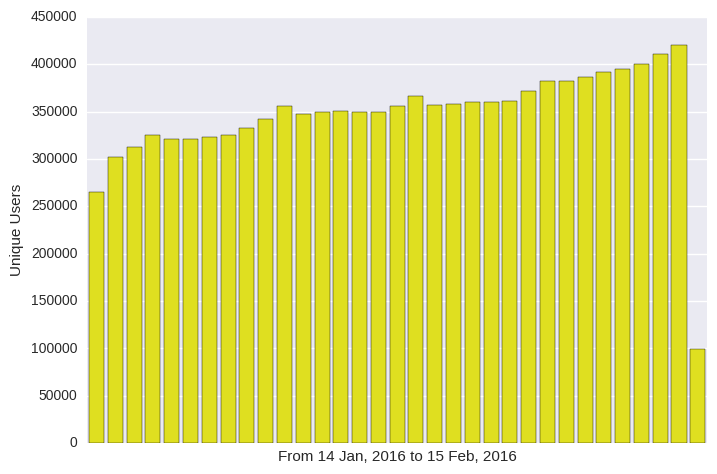

DAU (median) =  355519
DAU (mean) =  346389


In [4]:
ax = barplot(users_per_day.index, users_per_day['user_id'], color="yellow")
x_label = 'From ' + str(users_per_day.index.min().strftime('%d %b, %Y')) + ' to ' + str(users_per_day.index.max().strftime('%d %b, %Y'))
y_label = 'Unique Users'
ax.set(xlabel = x_label, ylabel = y_label)
ax.tick_params(labelbottom='off')
plt.show()

median_DAU = round(users_per_day['user_id'].median())
mean_DAU = round(users_per_day['user_id'].mean())
print('{0} {1}'.format('DAU (median) = ', median_DAU))
print('{0} {1}'.format('DAU (mean) = ', mean_DAU))

### Исключим последний, скорее всего неполный день, для более корректных результатов

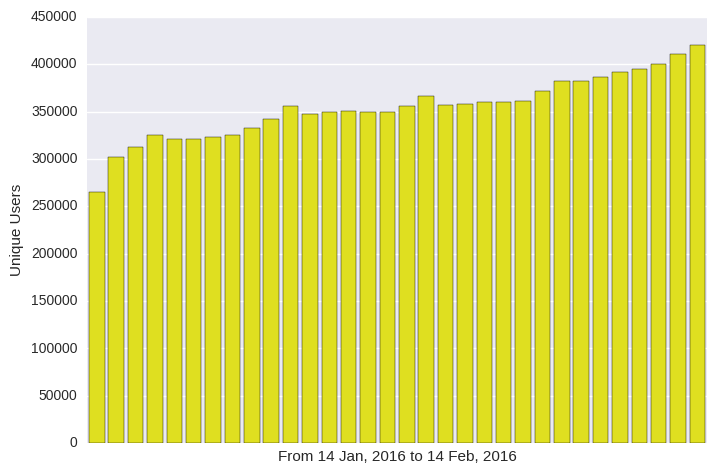

DAU (median) =  355646
DAU (mean) =  354101


In [5]:
users_per_day = users_per_day[:-1]

ax = barplot(users_per_day.index, users_per_day['user_id'], color="yellow")
x_label = 'From ' + str(users_per_day.index.min().strftime('%d %b, %Y')) + ' to ' + str(users_per_day.index.max().strftime('%d %b, %Y'))
y_label = 'Unique Users'
ax.set(xlabel = x_label, ylabel = y_label)
ax.tick_params(labelbottom='off')
plt.show()

median_DAU = round(users_per_day['user_id'].median())
mean_DAU = round(users_per_day['user_id'].mean())
print('{0} {1}'.format('DAU (median) = ', median_DAU))
print('{0} {1}'.format('DAU (mean) = ', mean_DAU))

#### Рассматриваемый период равен одному месяцу, что, на мой взгляд, является оптимальной базой для расчёта DAU в данном случае. Как видно выше, показатель DAU равен:
* #### DAU (median) =  355 646
* #### DAU (mean) =  354 101